<a href="https://colab.research.google.com/github/ArminD93/BigFivePersonalityTest/blob/dev/BigFivePersonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Five Personality Test**
---

# **Spis treści:**

# 1. [**Opis wartości z kolumn**](#0)
# 2. [**Import bibliotek**](#1)
# 3. [**Przygotowanie danych:**](#2)
  ## 3.1. [Prezentacja danych](#3)
  ## 3.2. [Zmiana typu object na typ category i datetime](#4)
  ## 3.3. [Brakujące wartości](#5)
  ## 3.3. [Wybranie rekordów gdzie IPC != 1](#6)
# 4. [**Analiza danych:**](#7)
  ## 4.1. [Liczba wystąpień poszczególnych odpowiedzi dla każdego pytania](#8)









  
    
 










# <a name='0'></a> **1. Opis wartości z kolumn**

The following items were presented on one page and each was rated on a five point scale using radio buttons. The order on page was was EXT1, AGR1, CSN1, EST1, OPN1, EXT2, etc.
The scale was labeled 1=Disagree, 3=Neutral, 5=Agree


|Oznaczenie |Opis |Oznaczenie |Opis|Oznaczenie |Opis|
|--------- |:----|--------  |:---|:-----  |:----|
|**EXT1**	|I am the life of the party.|**EST1**	|I get stressed out easily.|**AGR1**	|I feel little concern for others.|
|**EXT2**	|I don't talk a lot.|**EST2**	|I am relaxed most of the time.|**AGR2**	|I am interested in people.|
|**EXT3**	|I feel comfortable around people.|**EST3**	|I worry about things.|**AGR3**	|I insult people.|
|**EXT4**	|I keep in the background.|**EST4**	|I seldom feel blue.|**AGR4**	|I sympathize with others' feelings.|
|**EXT5**	|I start conversations.|**EST5** |I am easily disturbed.|**AGR5**	|I am not interested in other people's problems.|
|**EXT6**	|I have little to say.|**EST6**	|I get upset easily.|**AGR6**	|I have a soft heart.|
|**EXT7**	|I talk to a lot of different people at parties.|**EST7**	|I change my mood a lot.|**AGR7**	|I am not really interested in others.|
|**EXT8**	|I don't like to draw attention to myself.|**EST8**	|I have frequent mood swings.|**AGR8**	|I take time out for others.|
|**EXT9**	|I don't mind being the center of attention.|**EST9**	|I get irritated easily.|**AGR9**	|I feel others' emotions.|
|**EXT10** |I am quiet around strangers.|**EST10** |I often feel blue.|**AGR10**	|I make people feel at ease.|
|||||||
|**CSN1**	|I am always prepared.|**OPN1**	|I have a rich vocabulary.| **dateload**|The timestamp when the survey was started.|
|**CSN2**	|I leave my belongings around.|**OPN2**	|I have difficulty understanding abstract ideas.|**screenw**|The width the of user's screen in pixels|
|**CSN3**	|I pay attention to details.|**OPN3**	|I have a vivid imagination.|**screenh**|The height of the user's screen in pixels|
|**CSN4**	|I make a mess of things.|**OPN4**	|I am not interested in abstract ideas.|**introelapse**|The time in seconds spent on the landing / intro page|
|**CSN5**	|I get chores done right away.|**OPN5**	|I have excellent ideas.|**testelapse**|The time in seconds spent on the page with the survey questions|
|**CSN6**	|I often forget to put things back in their proper place.|**OPN6**	|I do not have a good imagination.|**endelapse**|The time in seconds spent on the finalization page (where the user was asked to indicate if they has answered accurately and their answers could be stored and used for research. Again: this dataset only includes users who answered "Yes" to this question, users were free to answer no and could still view their results either way)|
|**CSN7**	|I like order.|**OPN7**	|I am quick to understand things.|**IPC**|The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions|
|**CSN8**	|I shirk my duties.|**OPN8**	|I use difficult words.|**country**|The country, determined by technical information (NOT ASKED AS A QUESTION)|
|**CSN9**	|I follow a schedule.|**OPN9**	|I spend time reflecting on things.|**lat_appx_lots_of_err**|approximate latitude of user. determined by technical information, THIS IS NOT VERY ACCURATE.|
|**CSN10** |I am exacting in my work.|**OPN10** |I am full of ideas.|**long_appx_lots_of_err**| approximate longitude of user|


---



The time spent on each question is also recorded in milliseconds. These are the variables ending in **_E**. This was calculated by taking the time when the button for the question was clicked minus the time of the most recent other button click.


# <a name='1'></a> **2. Import bibliotek**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns


%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# <a name='2'></a> **3. Przygotowanie danych**

## <a name='3'></a>3.1. Prezentacja danych

In [2]:
BigFive_raw = pd.read_csv(
                          '/content/drive/My Drive/ColabNotebooks/BigFivePersonality/data-final.csv', low_memory=False, sep='\t',
                          
                          usecols=['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10',
                                   'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10',
                                   'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10',
                                   'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10',
                                   'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10',

                                  #  'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E',
                                  #  'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E',
                                  #  'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E',
                                  #  'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E',
                                  #  'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E',

                                   'dateload', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'
                           
                                   ]
                          )

# Kopia danych
BigFive = BigFive_raw.copy()                         
                            
BigFive.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,dateload,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2016-03-03 02:01:01,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,2016-03-03 02:01:20,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2016-03-03 02:01:56,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,2016-03-03 02:02:02,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,2016-03-03 02:02:57,8.0,315.0,17,2,KE,1.0,38.0


In [3]:
BigFive.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 58 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   EXT1                   1013558 non-null  float64
 1   EXT2                   1013558 non-null  float64
 2   EXT3                   1013558 non-null  float64
 3   EXT4                   1013558 non-null  float64
 4   EXT5                   1013558 non-null  float64
 5   EXT6                   1013558 non-null  float64
 6   EXT7                   1013558 non-null  float64
 7   EXT8                   1013558 non-null  float64
 8   EXT9                   1013558 non-null  float64
 9   EXT10                  1013558 non-null  float64
 10  EST1                   1013558 non-null  float64
 11  EST2                   1013558 non-null  float64
 12  EST3                   1013558 non-null  float64
 13  EST4                   1013558 non-null  float64
 14  EST5              

## <a name='4'></a>3.2. Zmiana typu object na typ category i datetime

In [4]:
BigFive.columns[:50]

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'],
      dtype='object')

In [5]:
cols_name_list = list(BigFive.columns[:50]) + ['country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err', 'dateload']


for i, col_name in enumerate(cols_name_list):

  if col_name == 'dateload':
    BigFive['dateload'] = pd.to_datetime(BigFive['dateload'])
  else:
    BigFive[col_name] = BigFive[col_name].astype('category')



BigFive.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 58 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   EXT1                   1013558 non-null  category      
 1   EXT2                   1013558 non-null  category      
 2   EXT3                   1013558 non-null  category      
 3   EXT4                   1013558 non-null  category      
 4   EXT5                   1013558 non-null  category      
 5   EXT6                   1013558 non-null  category      
 6   EXT7                   1013558 non-null  category      
 7   EXT8                   1013558 non-null  category      
 8   EXT9                   1013558 non-null  category      
 9   EXT10                  1013558 non-null  category      
 10  EST1                   1013558 non-null  category      
 11  EST2                   1013558 non-null  category      
 12  EST3                   10135

## <a name='5'></a>3.3. Brakujące wartości

In [6]:
BigFive.isnull().sum()

EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
EXT6                     1783
EXT7                     1783
EXT8                     1783
EXT9                     1783
EXT10                    1783
EST1                     1783
EST2                     1783
EST3                     1783
EST4                     1783
EST5                     1783
EST6                     1783
EST7                     1783
EST8                     1783
EST9                     1783
EST10                    1783
AGR1                     1783
AGR2                     1783
AGR3                     1783
AGR4                     1783
AGR5                     1783
AGR6                     1783
AGR7                     1783
AGR8                     1783
AGR9                     1783
AGR10                    1783
CSN1                     1783
CSN2                     1783
CSN3                     1783
CSN4      

In [7]:
BigFive[pd.isnull(BigFive['EXT1'])].head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,dateload,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
78795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-03 11:12:38,30.0,NaN,133,1,US,38.0,-97.0
78854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-03 12:02:08,41.0,NaN,25,32,US,26.5584,-81.8997
78889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-03 12:19:04,15.0,NaN,11,3,US,28.0222,-81.7329
153202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-12 01:42:46,5.0,NaN,64279,77,SG,1.3667,103.8
153204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-12 01:43:12,22.0,NaN,55,77,SG,1.3667,103.8


In [8]:
BigFive = BigFive.dropna()
BigFive.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012050 entries, 0 to 1015340
Data columns (total 58 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   EXT1                   1012050 non-null  category      
 1   EXT2                   1012050 non-null  category      
 2   EXT3                   1012050 non-null  category      
 3   EXT4                   1012050 non-null  category      
 4   EXT5                   1012050 non-null  category      
 5   EXT6                   1012050 non-null  category      
 6   EXT7                   1012050 non-null  category      
 7   EXT8                   1012050 non-null  category      
 8   EXT9                   1012050 non-null  category      
 9   EXT10                  1012050 non-null  category      
 10  EST1                   1012050 non-null  category      
 11  EST2                   1012050 non-null  category      
 12  EST3                   10120

## <a name='6'></a>3.4. Wybranie rekordów gdzie IPC != 1

IPC         The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions

In [9]:
BigFive.IPC != 1

0          False
1          False
2          False
3          False
4           True
           ...  
1015336     True
1015337    False
1015338     True
1015339    False
1015340    False
Name: IPC, Length: 1012050, dtype: bool

In [10]:
IPC_index = BigFive[BigFive.IPC != 1].index

BigFive.drop(IPC_index , inplace=True)

In [11]:
BigFive.IPC != 1

0          False
1          False
2          False
3          False
5          False
           ...  
1015334    False
1015335    False
1015337    False
1015339    False
1015340    False
Name: IPC, Length: 694886, dtype: bool

In [12]:
BigFive.drop(['IPC'], 1, inplace=True)

In [13]:
BigFive.head(3)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,dateload,introelapse,testelapse,endelapse,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2016-03-03 02:01:01,9.0,234.0,6,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,2016-03-03 02:01:20,12.0,179.0,11,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2016-03-03 02:01:56,3.0,186.0,7,GB,54.9119,-1.3833


# <a name='7'></a> **4. Analiza danych**

## <a name='8'></a>4.1. Liczba wystąpień poszczególnych odpowiedzi dla każdego pytania

In [14]:
def create_countplot(decoded_question_dict, country_code=False):
  rows = 2
  cols = 5
  question_no = 0

  plt.style.use('dark_background')
  fig = plt.figure(figsize=(27,10))
  fig.subplots_adjust(hspace=0.3, wspace=0.3)

  if country_code == False:
    Big_five_data = BigFive
    sup_title_end = ' - wszystkie badane kraje'
  else:
    Big_five_data = BigFive[BigFive['country'].isin([country_code])]
    sup_title_end = f' dla kraju: {country_code}'

  for i in range(1, 11):   
    fig.add_subplot(rows, cols, i)

    question = [quest for quest in decoded_question_dict.keys()][question_no]
    decoded_question = [quest for quest in decoded_question_dict.values()][question_no]
    
    g = sns.countplot(data=Big_five_data, x = question)
    fig.suptitle(f'Zestaw pytań z grupy {question[:3]}'+sup_title_end, fontsize=16)
    g.set( xlabel=f'{question}: {decoded_question}')
    g.grid(color = "grey", linewidth = "0.5", linestyle = "-.") 

    question_no += 1

  plt.show()

In [15]:
decoded_EXTquestion_dict = {
                            'EXT1' : "I am the life of the party.",
                            'EXT2' : "I don't talk a lot.",
                            'EXT3' : "I feel comfortable around people.",
                            'EXT4' : "I keep in the background.",
                            'EXT5' : "I start conversations.",
                            'EXT6' : "I have little to say.",
                            'EXT7' : "I talk to a lot of different people at parties.",
                            'EXT8' : "I don't like to draw attention to myself.",
                            'EXT9' : "I don't mind being the center of attention.",
                            'EXT10' : "I am quiet around strangers."
                          }

decoded_ESTquestion_dict = {
                            'EST1' : "I get stressed out easily.",
                            'EST2' : "I am relaxed most of the time.",
                            'EST3' : "I worry about things.",
                            'EST4' : "I seldom feel blue.",
                            'EST5' : "I am easily disturbed.",
                            'EST6' : "I get upset easily.",
                            'EST7' : "I change my mood a lot.",
                            'EST8' : "I have frequent mood swings.",
                            'EST9' : "I get irritated easily.",
                            'EST10' : "I often feel blue."
                          }   
                          
decoded_AGRquestion_dict = {
                            'AGR1' : "I feel little concern for others.",
                            'AGR2' : "I am interested in people.",
                            'AGR3' : "I insult people.",
                            'AGR4' : "I sympathize with others' feelings.",
                            'AGR5' : "I am not interested in other people's problems.",
                            'AGR6' : "I have a soft heart.",
                            'AGR7' : "I am not really interested in others.",
                            'AGR8' : "I take time out for others.",
                            'AGR9' : "I feel others' emotions.",
                            'AGR10' : "I make people feel at ease."
                          }  


decoded_CSNquestion_dict = {
                            'CSN1' : "I am always prepared.",
                            'CSN2' : "I leave my belongings around.",
                            'CSN3' : "I pay attention to details.",
                            'CSN4' : "I make a mess of things.",
                            'CSN5' : "I get chores done right away.",
                            'CSN6' : "I often forget to put things back in their proper place.",
                            'CSN7' : "I like order.",
                            'CSN8' : "I shirk my duties.",
                            'CSN9' : "I follow a schedule.",
                            'CSN10' : "I am exacting in my work."
                          }                       

decoded_OPNquestion_dict = {
                            'OPN1' : "I have a rich vocabulary.",
                            'OPN2' : "I have difficulty understanding abstract ideas.",
                            'OPN3' : "I have a vivid imagination.",
                            'OPN4' : "I am not interested in abstract ideas.",
                            'OPN5' : "I have excellent ideas.",
                            'OPN6' : "I do not have a good imagination.",
                            'OPN7' : "I am quick to understand things.",
                            'OPN8' : "I use difficult words.",
                            'OPN9' : "I spend time reflecting on things.",
                            'OPN10' : "I am full of ideas."
                          }

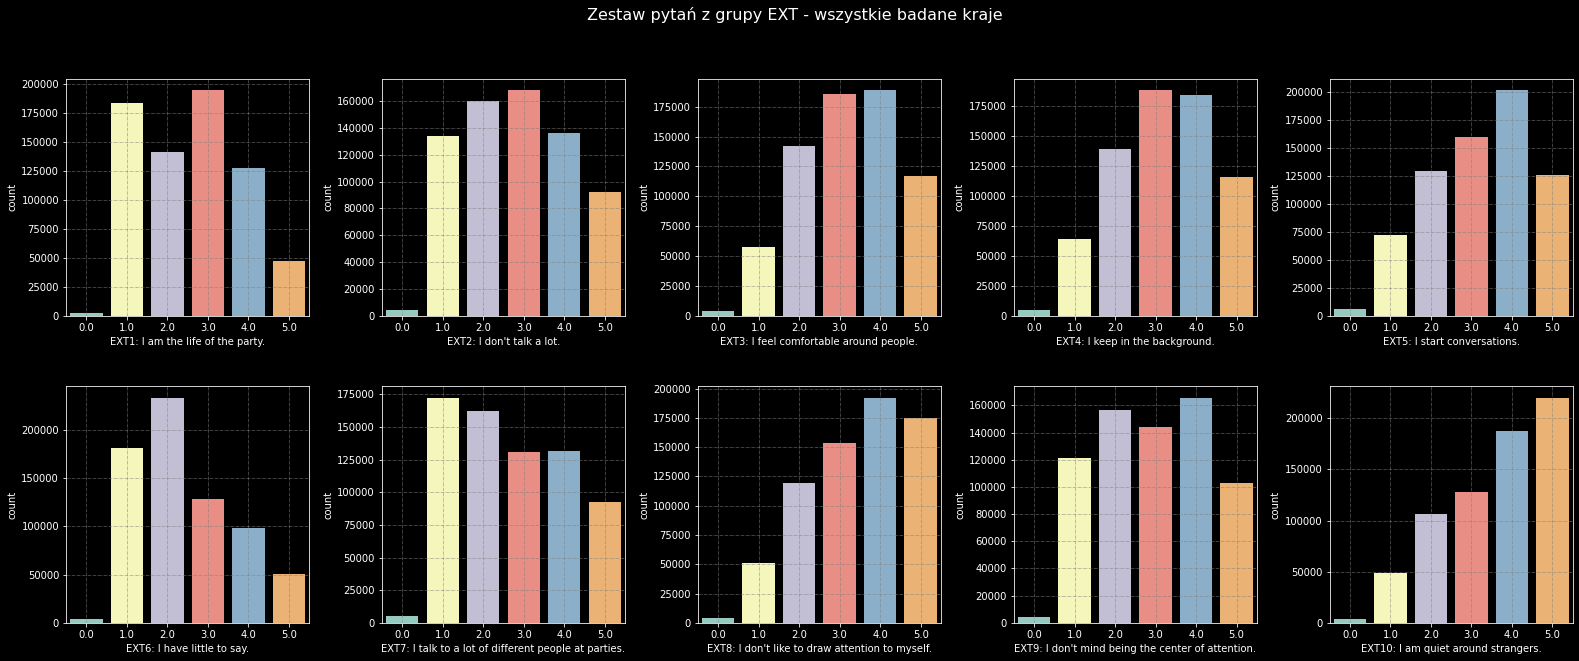

In [16]:
create_countplot(decoded_EXTquestion_dict)

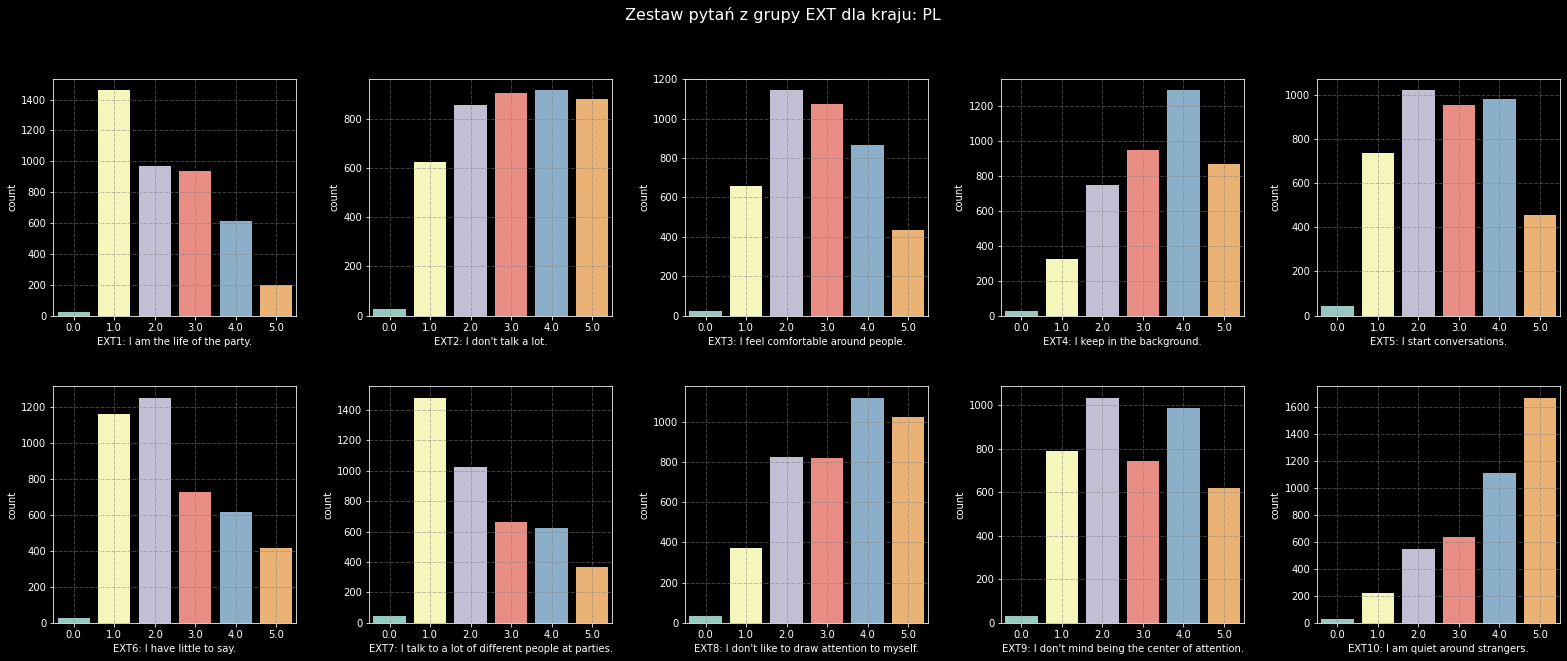

In [17]:
create_countplot(decoded_EXTquestion_dict, country_code='PL')

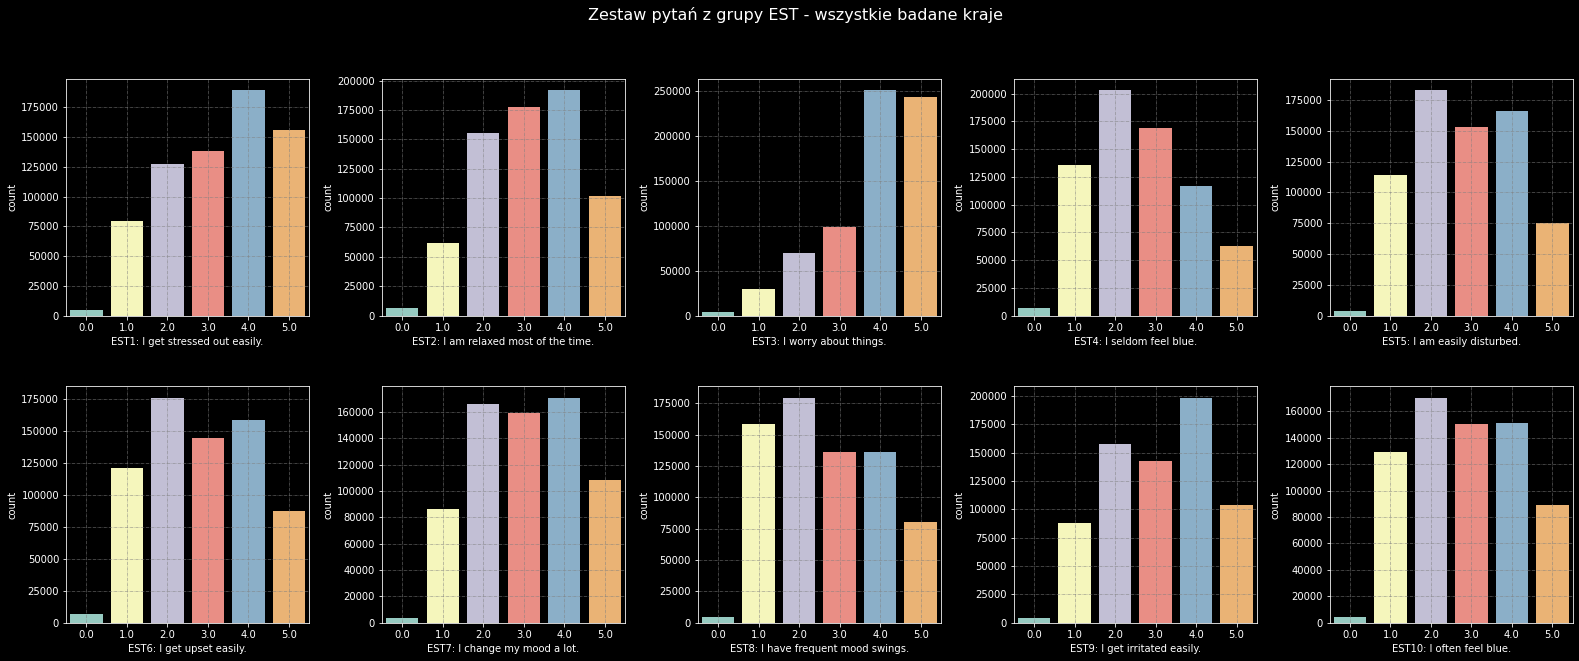

In [18]:
create_countplot(decoded_ESTquestion_dict)

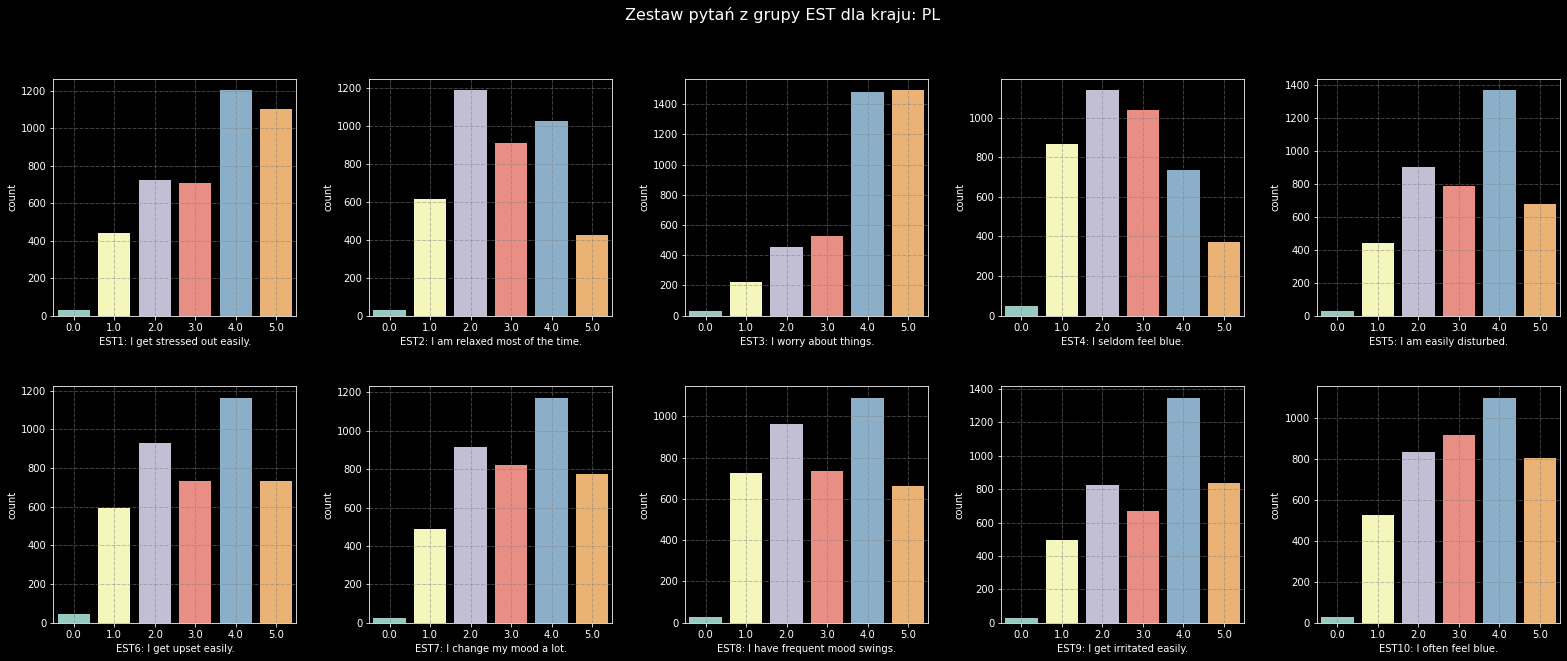

In [19]:
create_countplot(decoded_ESTquestion_dict, country_code='PL')

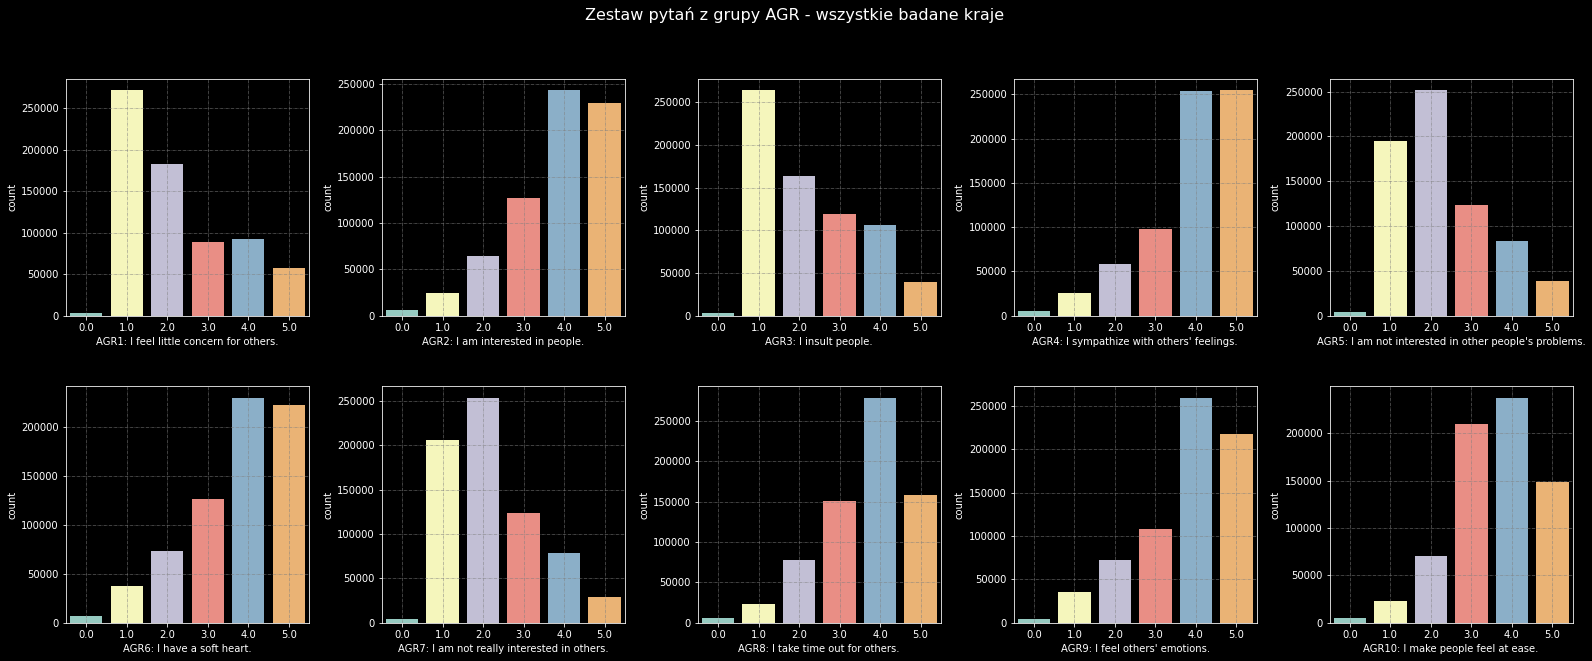

In [20]:
create_countplot(decoded_AGRquestion_dict)

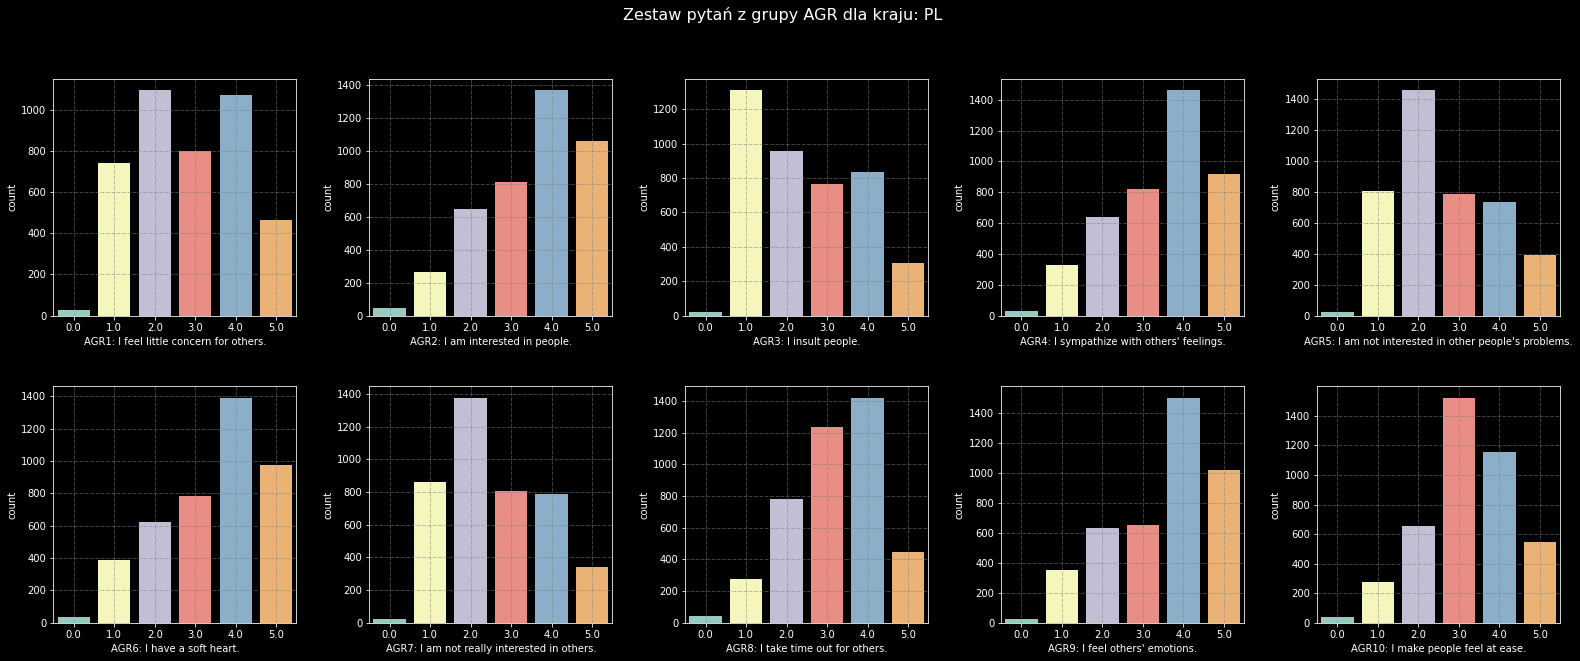

In [21]:
create_countplot(decoded_AGRquestion_dict, country_code='PL')

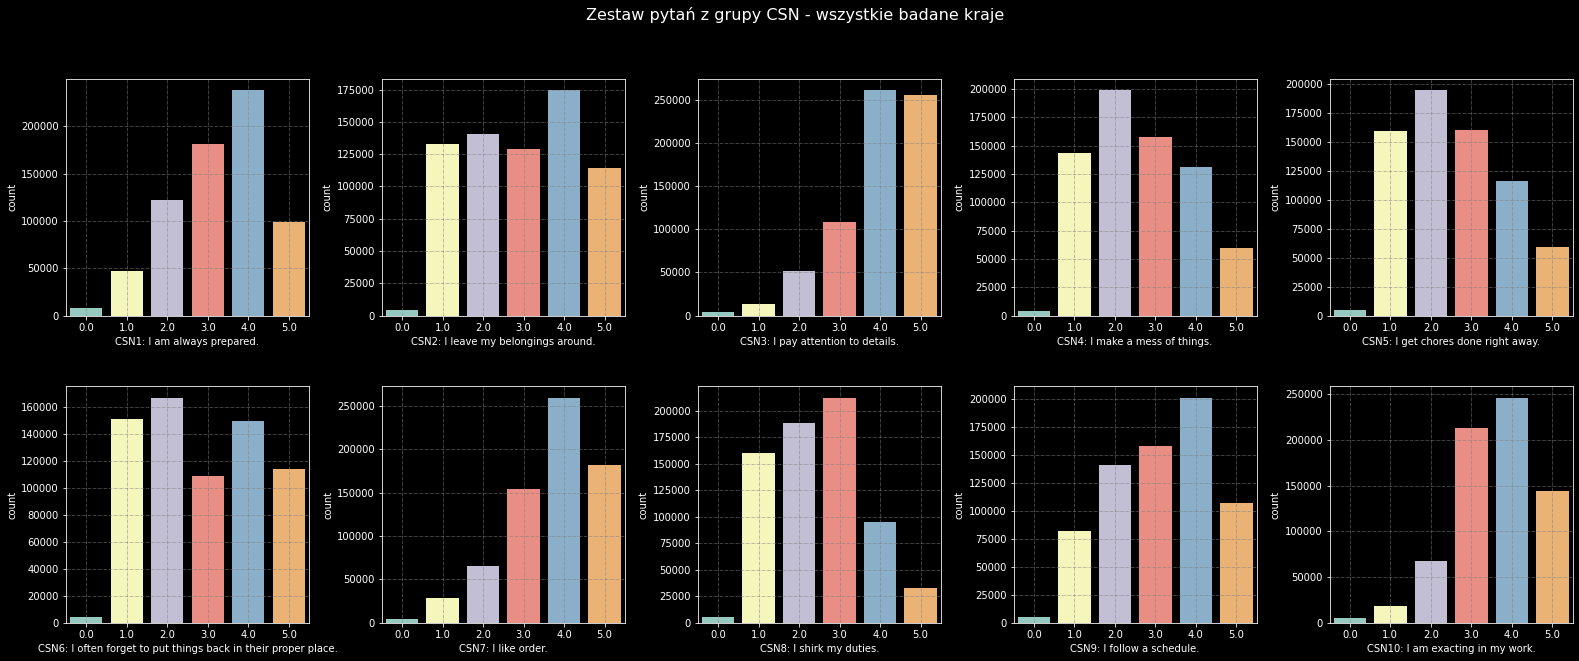

In [22]:
create_countplot(decoded_CSNquestion_dict)

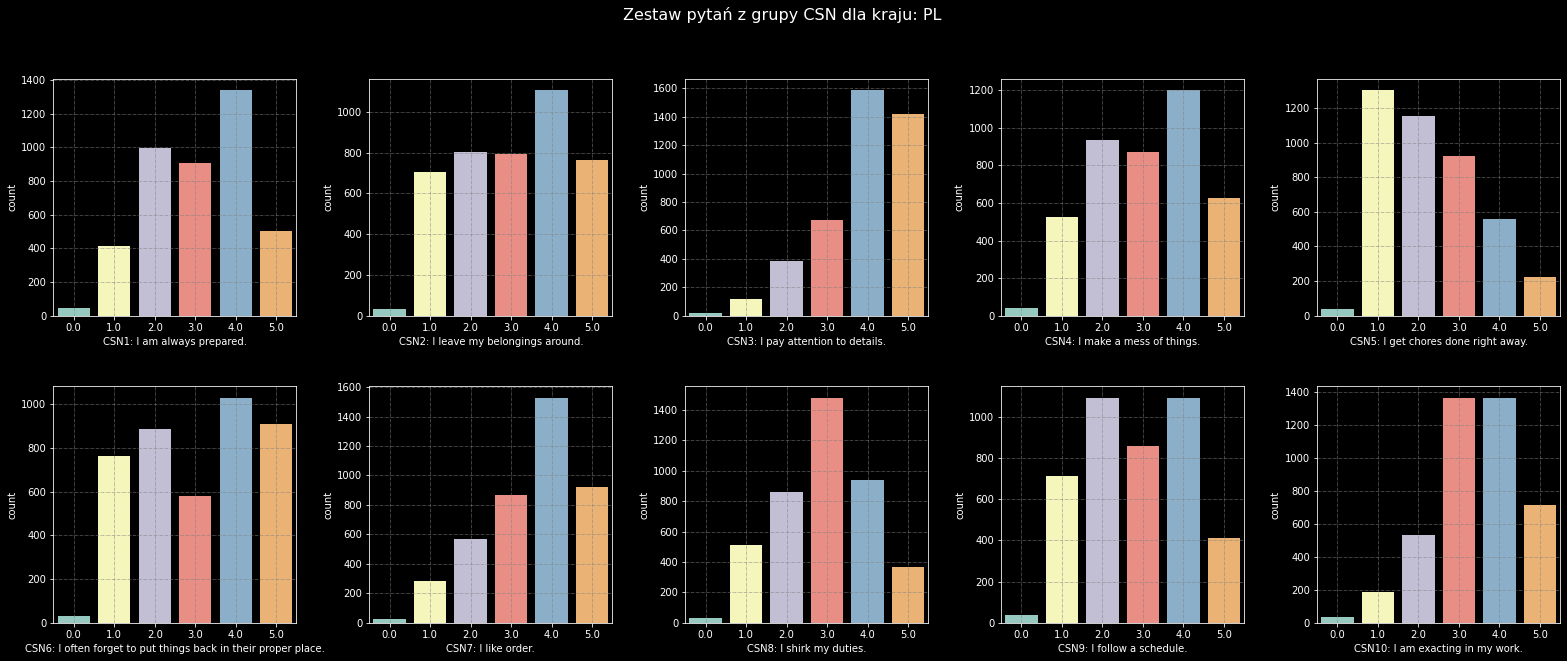

In [23]:
create_countplot(decoded_CSNquestion_dict, country_code='PL')

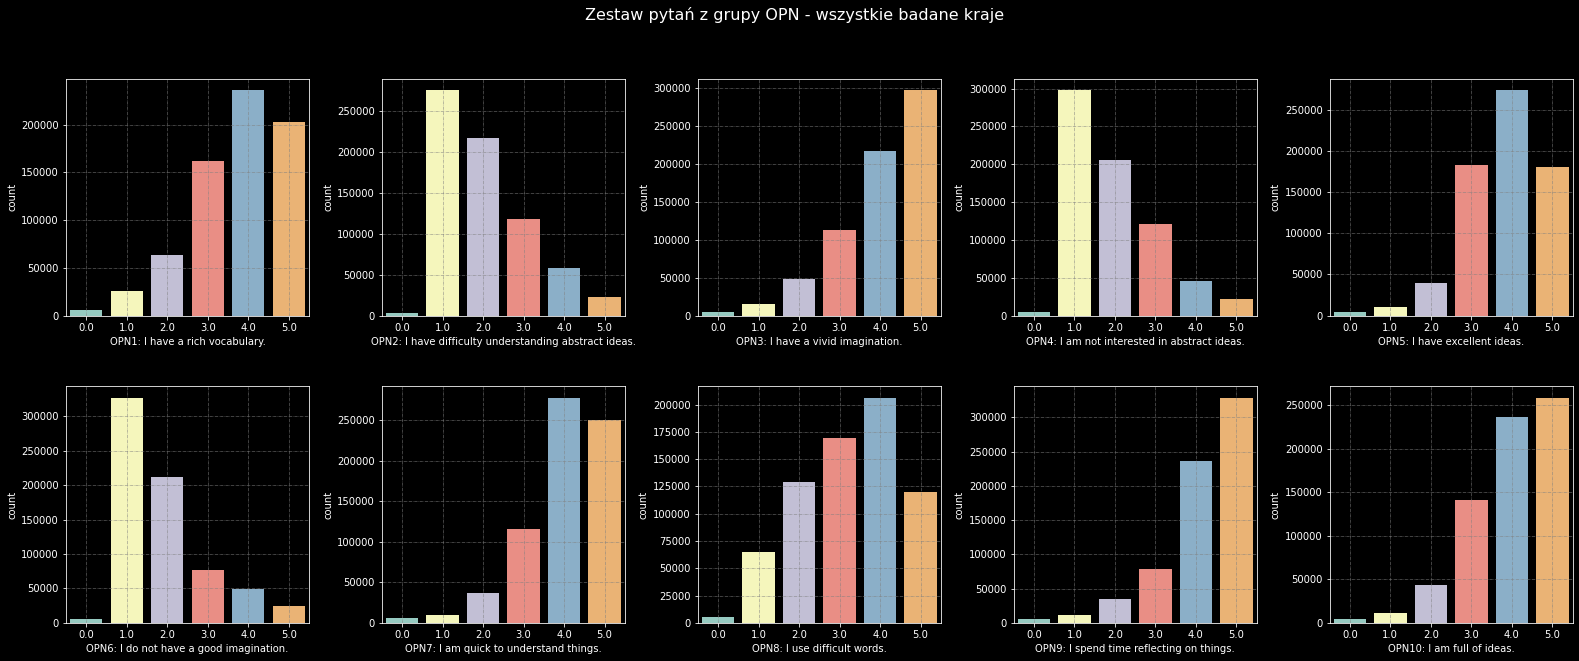

In [24]:
create_countplot(decoded_OPNquestion_dict)

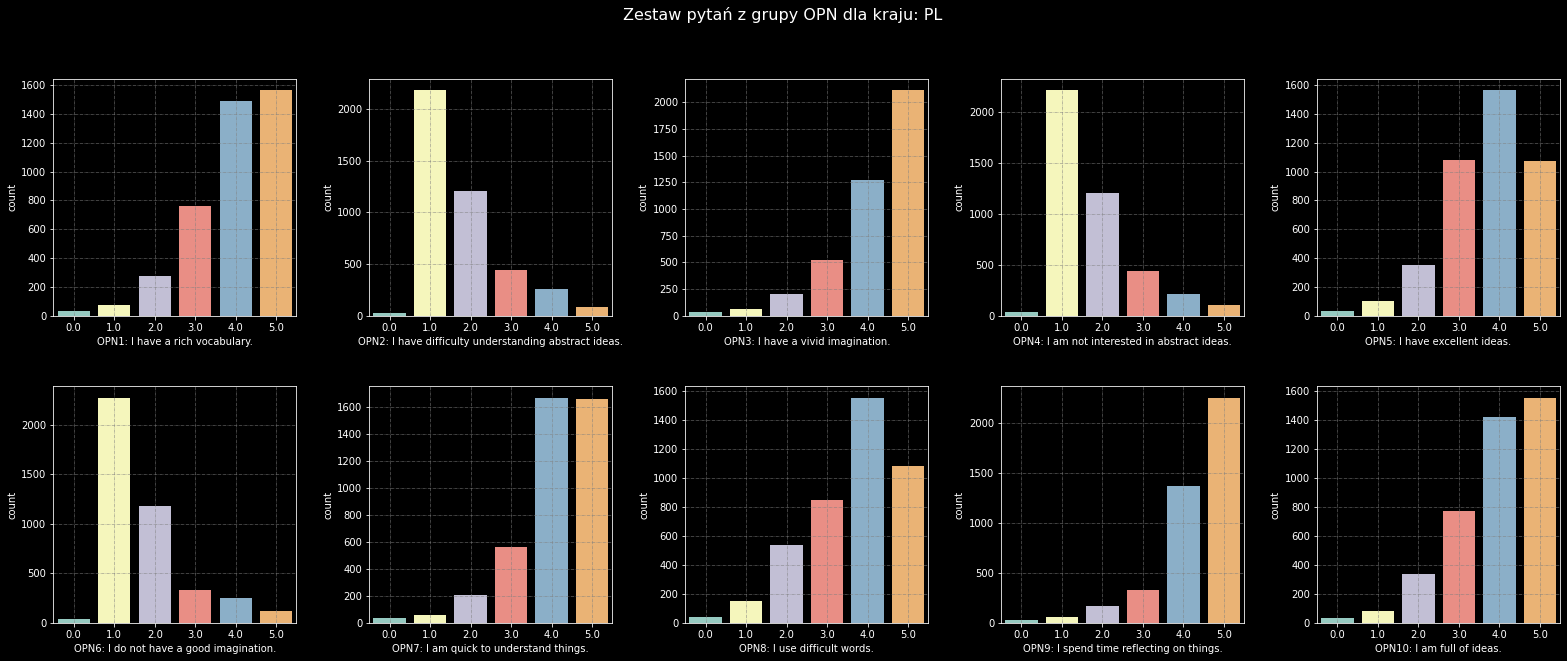

In [25]:
create_countplot(decoded_OPNquestion_dict, country_code='PL')

In [26]:
countries = BigFive['country'].unique()
countries

[GB, MY, SE, US, FI, ..., DJ, ML, GN, AS, SH]
Length: 221
Categories (221, object): [GB, MY, SE, US, ..., ML, GN, AS, SH]

In [27]:
BigFive.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,dateload,introelapse,testelapse,endelapse,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2016-03-03 02:01:01,9.0,234.0,6,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,2016-03-03 02:01:20,12.0,179.0,11,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2016-03-03 02:01:56,3.0,186.0,7,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,2016-03-03 02:02:02,186.0,219.0,7,GB,51.75,-1.25
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,3.0,4.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0,2016-03-03 02:03:12,4.0,196.0,3,SE,59.3333,18.05
